In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re

In [34]:
from google.colab import files
uploaded = files.upload()

Saving nlpaug_4000.csv to nlpaug_4000.csv


In [47]:
from google.colab import files
uploaded = files.upload()

Saving nlpaug1000.csv to nlpaug1000.csv
Saving nlpaug2000.csv to nlpaug2000.csv
Saving nlpaug3000.csv to nlpaug3000.csv
Saving nlpaug4000.csv to nlpaug4000.csv
Saving nlpaug5000.csv to nlpaug5000.csv
Saving nlpaug6000.csv to nlpaug6000.csv
Saving nlpaug7000.csv to nlpaug7000.csv
Saving nlpaug8000.csv to nlpaug8000.csv


In [35]:
import pandas as pd
data = pd.read_csv('nlpaug_4000.csv')

In [ ]:
!pip install textattack

In [ ]:
import textattack

In [ ]:
from textattack.augmentation import CLAREAugmenter
wordnet_aug = CLAREAugmenter()
for i in range(len(data)):
  text = data["LEMM"].iloc[i]
  temp=wordnet_aug.augment(text)
  synthesised = {
                  "IsToxic":data["IsToxic"].iloc[i],
                  "IsAbusive":data["IsAbusive"].iloc[i],
                  "IsThreat":data["IsThreat"].iloc[i],
                  "IsProvocative":data["IsProvocative"].iloc[i],
                  "IsObscene":data["IsObscene"].iloc[i],
                  "IsHatespeech":data["IsHatespeech"].iloc[i],
                  "IsRacist":data["IsRacist"].iloc[i],
                  "IsNationalist":data["IsNationalist"].iloc[i],
                  "IsSexist":data["IsSexist"].iloc[i],
                  "IsReligiousHate":data["IsReligiousHate"].iloc[i],
                  "LEMM":temp[0]
                  }
  print("currently at index ", i)
  data = data.append(synthesised,ignore_index = True)
    # id += 1
    # tweet_augmented_2 = aug.augment(df_train["tweet"].iloc[i],n=1)
    # df2 = {'tweet': tweet_augmented_2[0], 'label': 0, 'id':id}
    # df_train = df_train.append(df2, ignore_index = True)

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:594: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Downloading:   0%|          | 0.00/75.2M [00:00<?, ?B/s]

2022-12-04 09:44:45,819 loading file /root/.flair/models/upos-english-fast/b631371788604e95f27b6567fe7220e4a7e8d03201f3d862e6204dbf90f9f164.0afb95b43b32509bf4fcc3687f7c64157d8880d08f813124c1bd371c3d8ee3f7
2022-12-04 09:44:45,902 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, INTJ, PUNCT, VERB, PRON, NOUN, ADV, DET, ADJ, ADP, NUM, PROPN, CCONJ, PART, AUX, X, SYM, <START>, <STOP>
currently at index  0
currently at index  1
currently at index  2
currently at index  3
currently at index  4
currently at index  5
currently at index  6
currently at index  7
currently at index  8
currently at index  9
currently at index  10
currently at index  11
currently at index  12
currently at index  13
currently at index  14
currently at index  15
currently at index  16
currently at index  17
currently at index  18
currently at index  19
currently at index  20
currently at index  21
currently at index  22
currently at index  23
currently at index  24
currently at index  25
currently at index

In [ ]:
data.to_csv('clare.csv') 
files.download('clare.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
raw = data.iloc[0:1000,:]
aug = data.iloc[1000:,:]

In [37]:
Y_raw = raw['IsToxic']
X_raw = raw['LEMM']
Y_aug = aug['IsToxic']
X_aug = aug['LEMM']

In [38]:
X_train_temp, X_test_temp, Y_train_temp , Y_test_temp = train_test_split(X_raw,Y_raw)

In [39]:
X_test = X_test_temp
Y_test = Y_test_temp

In [40]:
X_aug = np.concatenate((X_aug , X_train_temp))
Y_aug = np.concatenate((Y_aug , Y_train_temp))

In [41]:
Y_train = Y_aug
X_train_bow = X_aug
X_test_bow = X_test
Y_test = Y_test

In [42]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train_bow)
X_train_bow = vectorizer.transform(X_train_bow)
X_test_bow = vectorizer.transform(X_test_bow)

In [43]:
X_train_bow = X_train_bow.toarray()
# Y_train = Y_train.to_numpy()
X_test_bow = X_test_bow.toarray()
Y_test = Y_test.to_numpy() 

In [44]:
clf = LogisticRegression()
clf.fit(X_train_bow , Y_train)

LogisticRegression()

In [45]:
y_pred = clf.predict(X_test_bow)
accuracy_score(y_pred , Y_test)

0.972

In [86]:
accuracies = []

In [87]:
def check_LR(data):
    raw = data.iloc[0:1000,:]
    aug = data.iloc[1000:,:]

    Y_raw = raw['IsToxic']
    X_raw = raw['LEMM']
    Y_aug = aug['IsToxic']
    X_aug = aug['LEMM']

    X_train_temp, X_test_temp, Y_train_temp , Y_test_temp = train_test_split(X_raw,Y_raw)

    X_test = X_test_temp
    Y_test = Y_test_temp

    X_aug = np.concatenate((X_aug , X_train_temp))
    Y_aug = np.concatenate((Y_aug , Y_train_temp))

    Y_train = Y_aug
    X_train_bow = X_aug
    X_test_bow = X_test
    Y_test = Y_test

    vectorizer = CountVectorizer()
    vectorizer.fit(X_train_bow)
    X_train_bow = vectorizer.transform(X_train_bow)
    X_test_bow = vectorizer.transform(X_test_bow)

    X_train_bow = X_train_bow.toarray()
    # Y_train = Y_train.to_numpy()
    X_test_bow = X_test_bow.toarray()
    Y_test = Y_test.to_numpy() 

    X_train_tf = X_aug
    # Y_train = Y_train
    X_test_tf = X_test
    # Y_test = Y_test

    # Tf-IDF generator
    vectorizer_tf = TfidfVectorizer(lowercase=True,stop_words='english')
    vectorizer_tf.fit(X_train_tf)
    X_train_tf = vectorizer.transform(X_train_tf)
    X_test_tf = vectorizer.transform(X_test_tf)

    X_temp_tf = X_train_tf.toarray()
    # Y_temp_tf = Y_train_tf.to_numpy()
    X_temp_test_tf = X_test_tf.toarray()
    Y_temp_test_tf = Y_test_tf.to_numpy()

    # X_train -> X_train_tf
    # Y_train -> Y_train
    # X_test -> X_temp_test_tf
    # Y_test -> Y_test

    clf1 = LogisticRegression()
    clf1.fit(X_train_bow , Y_train)

    y_pred1 = clf1.predict(X_test_bow)
    score1 = accuracy_score(y_pred1 , Y_test)

    clf = LogisticRegression()
    clf.fit(X_train_tf , Y_train)

    y_pred = clf.predict(X_temp_test_tf)
    score = accuracy_score(y_pred , Y_test)

    return (score1,score)

In [88]:
data1 = pd.read_csv('nlpaug1000.csv')
data2 = pd.read_csv('nlpaug2000.csv')
data3 = pd.read_csv('nlpaug3000.csv')
data4 = pd.read_csv('nlpaug4000.csv')
data5 = pd.read_csv('nlpaug5000.csv')
data6 = pd.read_csv('nlpaug6000.csv')
data7 = pd.read_csv('nlpaug7000.csv')
data8 = pd.read_csv('nlpaug8000.csv')

In [89]:
length = [len(data1),len(data2),len(data3),len(data4),len(data5),len(data6),len(data7),len(data8)]
data = [data1,data2,data3,data4,data5,data6,data7,data8]

In [90]:
length

[2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

In [91]:
for dat in data:
    sc = check_LR(dat)
    accuracies.append(sc)

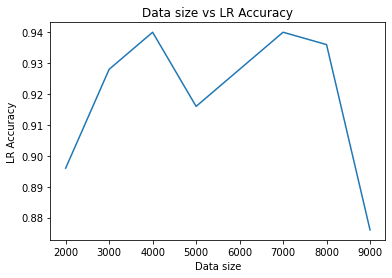

In [92]:
import matplotlib.pyplot as plt
plt.plot(length,accuracies)
plt.title('Data size vs LR Accuracy')
plt.xlabel('Data size')
plt.ylabel('LR Accuracy')
plt.show()

In [94]:
accuracies

[0.896, 0.928, 0.94, 0.916, 0.928, 0.94, 0.936, 0.876]